
# Chronic Kidney Disease

#### Data Set Information:

We use the following representation to collect the dataset<br>
age - age<br>
bp - blood pressure<br>
sg - specific gravity<br>
al - albumin<br>
su - sugar<br>
rbc - red blood cells<br>
pc - pus cell<br>
pcc - pus cell clumps<br>
ba - bacteria<br>
bgr - blood glucose random<br>
bu - blood urea<br>
sc - serum creatinine<br>
sod - sodium<br>
pot - potassium<br>
hemo - hemoglobin<br>
pcv - packed cell volume<br>
wc - white blood cell count<br>
rc - red blood cell count<br>
htn - hypertension<br>
dm - diabetes mellitus<br>
cad - coronary artery disease<br>
appet - appetite<br>
pe - pedal edema<br>
ane - anemia<br>
class - class<br>


#### Attribute Information:

We use 24 + class = 25 ( 11 numeric ,14 nominal)<br>
1. Age(numerical)
age in years<br>
2. Blood Pressure(numerical)
bp in mm/Hg<br>
3. Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)<br>
4. Albumin(nominal)
al - (0,1,2,3,4,5)
5. Sugar(nominal)
su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal)
rbc - (normal,abnormal)
7. Pus Cell (nominal)
pc - (normal,abnormal)
8. Pus Cell clumps(nominal)
pcc - (present,notpresent)
9. Bacteria(nominal)
ba - (present,notpresent)
10. Blood Glucose Random(numerical)
bgr in mgs/dl
11. Blood Urea(numerical)
bu in mgs/dl
12. Serum Creatinine(numerical)
sc in mgs/dl
13. Sodium(numerical)
sod in mEq/L
14. Potassium(numerical)
pot in mEq/L
15. Hemoglobin(numerical)
hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical)
wc in cells/cumm
18. Red Blood Cell Count(numerical)
rc in millions/cmm
19. Hypertension(nominal)
htn - (yes,no)
20. Diabetes Mellitus(nominal)
dm - (yes,no)
21. Coronary Artery Disease(nominal)
cad - (yes,no)
22. Appetite(nominal)
appet - (good,poor)
23. Pedal Edema(nominal)
pe - (yes,no)
24. Anemia(nominal)
ane - (yes,no)
25. Class (nominal)
class - (ckd,notckd)



In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Kidney_data.csv")
# Top 5 records:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [5]:
# Shape of dataset:
dataset.shape

(400, 25)

In [6]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# Description:
dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [9]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### Replacing Categorical values with numbers:

#### 1. rbc

In [10]:
dataset['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [11]:
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

#### 2. pc

In [12]:
dataset['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [13]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

#### 3. pcc

In [14]:
dataset['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [15]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

#### 4. ba

In [16]:
dataset['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [17]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

#### 5. htn

In [18]:
dataset['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [19]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 6. dm

In [20]:
dataset['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [21]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [22]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 7. cad

In [23]:
dataset['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [24]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [25]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 8. appet

In [26]:
dataset['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [27]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

#### 9. pe

In [28]:
dataset['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [29]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 10. ane

In [30]:
dataset['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [31]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

#### 11. classification

In [32]:
dataset['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [33]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [34]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [35]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [36]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

### Converting Object values into Numeric values:

In [37]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [38]:
# Datatypes:
dataset.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

In [39]:
# Description:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
classification      0
dtype: int64

### Handling Null Values:

- There is Outliers present in our dataset so We fill NaN values with Median.

In [41]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [42]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [43]:
for feature in features:
    dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [44]:
dataset.isnull().any().sum()

0

### Heatmap

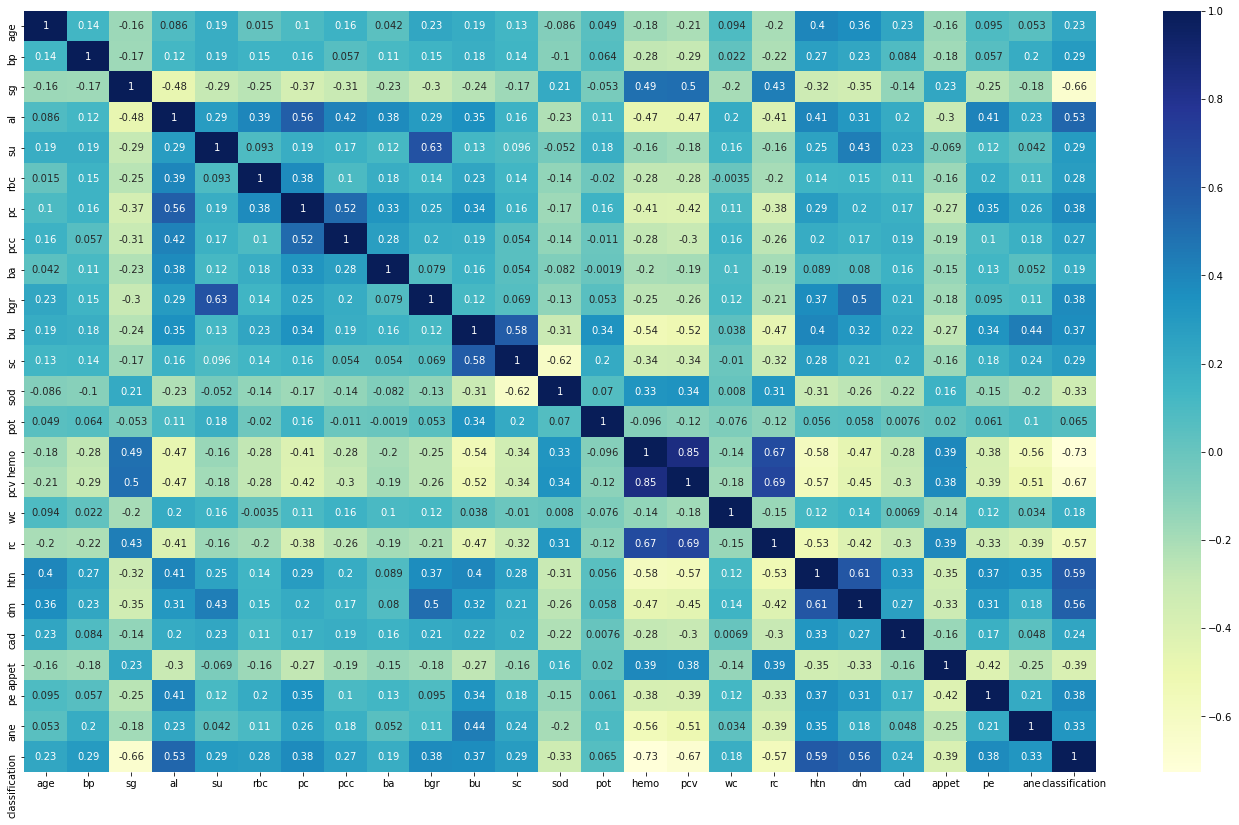

In [45]:
plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

- We clearly see that 'pcv' and 'hemo' feature has **85% multicollinearity** 
- So we remove one of the feature. i.e **pcv**

In [46]:
dataset.drop('pcv', axis=1, inplace=True)

In [47]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classification', ylabel='count'>

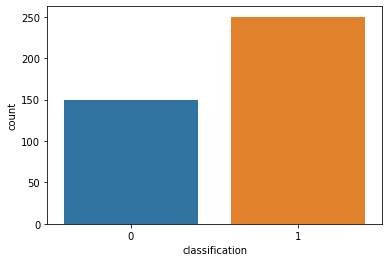

In [48]:
# Target feature:
sns.countplot(dataset['classification'])

In [49]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [50]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


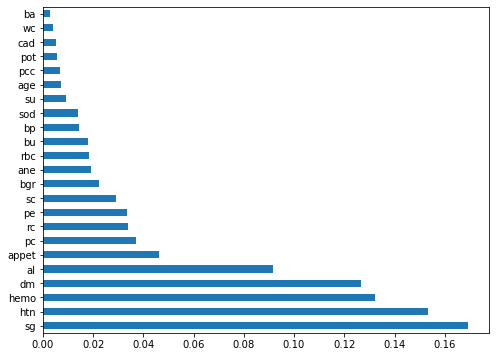

In [51]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

- We take top 8 feature only.

In [52]:
ranked_features.nlargest(8).index

Index(['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'pc', 'rc'], dtype='object')

In [53]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [62]:
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classification, dtype: int64

In [55]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [56]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


#### There is no need of Standardization and Normalization of our dataset, as we using Ensemble Technique.

In [57]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [59]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [60]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

